In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


In [2]:
TEST_N = 8
N_RE = 10
thread_times = Array{Float64}(undef,TEST_N)

for j in 1:TEST_N
    procs = addprocs(j)
    @everywhere include("../resk.jl")

    temp_res, thread_times[j] = @timed rangeexp_1d_inf(100,1000,N_RE;x_max_exp=220,distributed=true)
    rmprocs(workers())
end

RESK successfully loaded.
      From worker 2:	RESK successfully loaded.
RESK successfully loaded.
      From worker 3:	RESK successfully loaded.
      From worker 4:	RESK successfully loaded.
RESK successfully loaded.
      From worker 6:	RESK successfully loaded.
      From worker 7:	RESK successfully loaded.
      From worker 5:	RESK successfully loaded.
RESK successfully loaded.
      From worker 8:	RESK successfully loaded.
      From worker 9:	RESK successfully loaded.
      From worker 10:	RESK successfully loaded.
      From worker 11:	RESK successfully loaded.
RESK successfully loaded.
      From worker 14:	RESK successfully loaded.
      From worker 16:	RESK successfully loaded.
      From worker 13:	RESK successfully loaded.
      From worker 15:	RESK successfully loaded.
      From worker 12:	RESK successfully loaded.
RESK successfully loaded.
      From worker 21:	RESK successfully loaded.
      From worker 22:	RESK successfully loaded.
      From worker 18:	RESK successfu

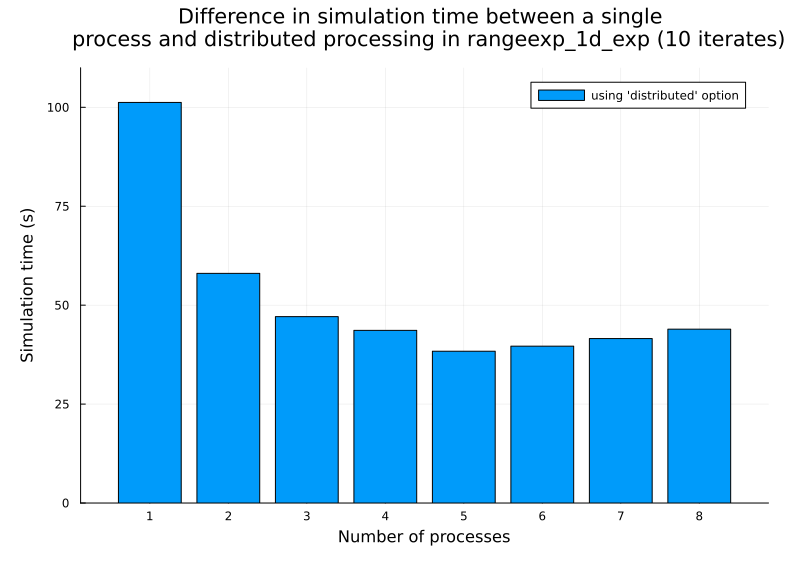

In [8]:
#Plots.bar(nothread_times,label="without 'distributed' option")
Plots.bar(thread_times,ylabel="Simulation time (s)",size=(800,570),ylims=(0,110),xlabel="Number of processes",label="using 'distributed' option",title="Difference in simulation time between a single \n process and distributed processing in rangeexp_1d_exp ($N_RE iterates)",xticks=(1:1:8))

That is the main result we wanted to see in this short example.

Finally, let's just confirm that our simulations are working and non-trivial:

In [7]:
temp_res = rangeexp_1d_inf(100,800,1;x_max_exp=190,distributed=true)

Dict{String, Any} with 5 entries:
  "pops"  => Float32[17.0 19.0 … 20.0 22.0; 19.0 26.0 … 22.0 29.0; … ; NaN NaN …
  "del"   => NaN
  "fitn"  => Float32[1.0 0.9997 … 0.472234 0.46847; 1.0 0.998401 … 0.476656 0.4…
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>1.8, "max_burnin"=…
  "ben"   => NaN

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_HoL8vyNw7a.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_HoL8vyNw7a.gif")
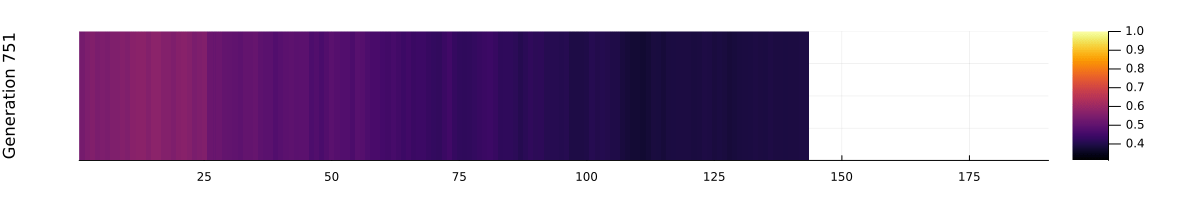

In [8]:
re_heatmap(temp_res["fitn"][:,:,1],750,800;n_gens_sub=0)

In [1]:
using Base.Threads

# Number of threads available
println("Number of threads: ", nthreads())

# Example: Parallel summation
function parallel_sum(arr)
    sum = 0.0
    @threads for i in 1:length(arr)
        sum += arr[i]
    end
    return sum
end

# Test the function
arr = rand(1_000_000)  # An array with random numbers
total = parallel_sum(arr)
println("Sum: ", total)

Number of threads: 1
Sum: 499657.43261429487
